# 5.2 분산분석

5.2.1 이 절의 예제

5.2.2 분산분석이 필요한 시기

- **분산분석**은 평균값의 차이를 검정하는 방법입니다. ... 분산분석을 사용해야 할 때는 세 개 이상의 수준 간의 평균값에 차이가 있는지 검정할 때입니다.

- 독립변수와 종속변수

5.2.3 검정의 다중성 (문제)

- 검정을 반복함으로써 유의미한 결과를 얻기 쉬워지는 문제를 **검정의 다중성**이라고 부릅니다. ... 검정을 2회 연속으로 했다고 합시다. ... 그러면 제1종 오류를 저지를 확률은 1 - (0.95 x 0.95) = 0.0975가 되어 거의 10%가 됩니다.

5.2.4 분산분석의 직감적 사고방식 

5.2.5 유의미한 차이가 있을 때와 없을 때의 바이올린플롯

In [1]:
# sns.violinplot(x="weather", y="beer", data=weather_beer)

5.2.6 분산분석의 직감적 사고방식: 오차 및 효과의 분리

5.2.7 군간변동과 군내변동

- 효과의 크기를 **군간변동**이라고 부릅니다.

- 오차의 크기를 **군내변동**이라고 부릅니다.

5.2.8 분석 준비

In [2]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

5.2.9 데이터 작성과 표시

In [3]:
weather = ["cloudy", "cloudy", "rainy", "rainy", "sunny", "sunny"]
beer = [6, 8, 2, 4, 10, 12]

weather_beer = pd.DataFrame({"beer": beer, "weather": weather})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

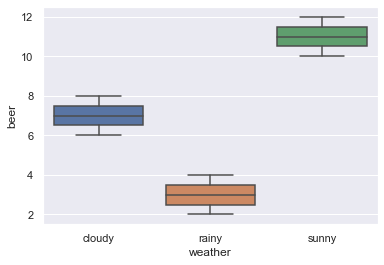

In [4]:
sns.boxplot(x="weather", y="beer", data=weather_beer)

In [5]:
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy      7
rainy       3
sunny      11


5.2.10 분산분석(1): 군간 제곱과 군내 제곱 계산

In [6]:
# 날씨에 의한 영향
effect = [7, 7, 3, 3, 11, 11]

# 군간 제곱합
mu_effect = np.mean(effect)
squares_model = np.sum((effect - mu_effect) ** 2)
print(f"군간 제곱합: {squares_model}")

군간 제곱합: 64.0


In [7]:
resid = weather_beer.beer - effect
print(resid)
print()

# 군내 제곱합
squares_resid = np.sum(resid ** 2)
print(f"군내 제곱합: {squares_resid}")

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

군내 제곱합: 6


5.2.11 분산분석(2): 군간 분산과 군내 분산 계산

In [8]:
df_model = 2
df_resid = 3

# 군간 평균제곱(분산)
variance_model = squares_model / df_model
print(f"군간 평균제곱(분산): {variance_model}")

# 군내 평균제곱(분산)
variance_resid = squares_resid / df_resid
print(f"군내 평균제곱(분산): {variance_resid}")

군간 평균제곱(분산): 32.0
군내 평균제곱(분산): 2.0


5.2.12 분산분석(3): *p*값 계산

In [9]:
f_ratio = variance_model / variance_resid
print(f"F비: {f_ratio}")

p_value = 1 - sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)
print(f"p-value: {p_value}")

F비: 16.0
p-value: 0.02509457330439091


5.2.13 독립변수가 카테고리형인 일반선형모델

5.2.14 더미변수

5.2.15 statsmodels를 이용한 분산분석

In [10]:
# 참고문헌: https://www.statsmodels.org/dev/example_formulas.html
anova_model = smf.ols("beer ~ weather", data=weather_beer).fit()

In [11]:
print(sm.stats.anova_lm(anova_model))

           df  sum_sq  mean_sq     F    PR(>F)
weather   2.0    64.0     32.0  16.0  0.025095
Residual  3.0     6.0      2.0   NaN       NaN


In [12]:
print(sm.stats.anova_lm(anova_model, typ=2))
# sum_sq: 군간과 군내의 편차제곱합
# df: 자유도
# F: F비
# PR(>F): p-value

          sum_sq   df     F    PR(>F)
weather     64.0  2.0  16.0  0.025095
Residual     6.0  3.0   NaN       NaN


5.2.17 모델의 계수 해석

In [13]:
print(anova_model.params)

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64


5.2.18 모델을 사용해서 오차와 효과 분리하기

In [14]:
fitted = anova_model.fittedvalues
print(fitted)
print()
print("residuals: ")
print(anova_model.resid)

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

residuals: 
0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64


5.2.19 회귀모델의 분산분석

In [15]:
beer = pd.read_csv("../../data/5-1-1-beer.csv")
lm_model = smf.ols(formula="beer ~ temperature", data=beer).fit()

In [16]:
df_lm_model = 1
df_lm_resid = 28

In [17]:
lm_effect = lm_model.fittedvalues
lm_resid = lm_model.resid

mu = np.mean(lm_effect)
squares_lm_model = np.sum((lm_effect - mu) ** 2)
variance_lm_model = squares_lm_model / df_lm_model

squares_lm_resid = np.sum((lm_resid) ** 2)
variance_lm_resid = squares_lm_resid / df_lm_resid

f_value_lm = variance_lm_model / variance_lm_resid

print(f_value_lm)

28.44698368850461


In [18]:
print(sm.stats.anova_lm(lm_model, typ=2))

                  sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN


In [19]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.11e-05
Time:                        13:06:25   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      

참고문헌: 

[1] 파이썬으로 배우는 통계학 교과서; 바바 신야 지음, 윤옹식 옮김; 한빛미디어 (2020)